# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.utils import resample

import statsmodels.api as sm

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

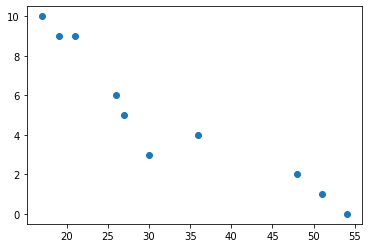

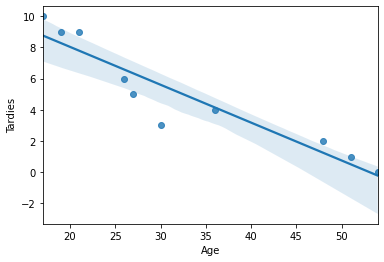

In [4]:
# Your code here.

plt.scatter(student_data['Age'], student_data['Tardies'])
plt.show()


sns.regplot(x="Age", y="Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 

# Do you see a trend?  -- Yes

# Can you make any hypotheses about the relationship between age and number of tardies?  
# -- The younger are students, the more they are late


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
correl_matrix = student_data.corr()

(correl_matrix)

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [7]:
covar_matrix = student_data.cov()

covar_matrix

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [8]:
# Your response here.
# correlation:

# -0.939163 says strong negative correlation

# covariance:



In [9]:
# “Covariance” indicates the direction of the linear relationship between variables. 
# “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.

In [10]:
# The correlation coefficient is the term used to refer to the resulting correlation measurement. 
# It will always maintain a value between one and negative one.

# When the correlation coefficient is one, the variables under examination have a perfect positive correlation. 
# In other words, when one moves, so does the other in the same direction, proportionally.



# Covariance provides insight into how two variables are related to one another. 

# More precisely, covariance refers to the measure of how two random variables in a data set will change together. 

# A positive covariance means that the two variables at hand are positively related, and they move in the same direction. 

# A negative covariance means that the variables are inversely related, or that they move in opposite directions. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here.

# What will be your outcome variable? Number of tardies

# What type of regression are you using? Linear regression 

Plot your regression model on your scatter plot.

In [12]:
# Your code here.

X = student_data['Age']
Y = student_data['Tardies']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

C:\Users\begen\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           5.57e-05
Time:                        16:20:27   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [13]:
# Your response here. 

# p-value is close to 0, for this reason we can not reject the hypothesis that the age is not influencing the delay.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')

vehicles.head()



,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

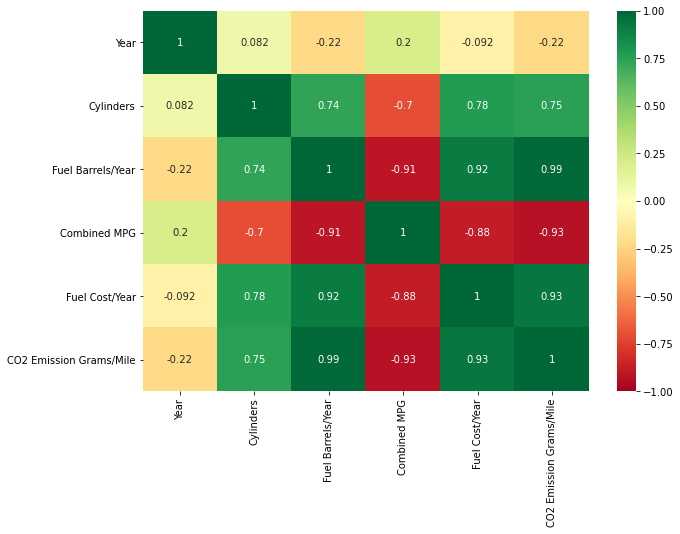

In [15]:
# Your response here:  

# Which variable do you think will be the most important in determining CO2 emissions? 

vehicles.columns

vehicles1 = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

correl_matrix = vehicles1.corr()

#print(correl_matrix)

fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(vehicles1.corr(), cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True)




Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [17]:
# Your response here. Model 1

X = vehicles1[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles1[['CO2 Emission Grams/Mile']]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                             16:23:23   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [18]:
# Your response here. Model 2

X = vehicles1[['Year', 'Cylinders']]
Y = vehicles1[['CO2 Emission Grams/Mile']]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.648
Model:                                 OLS   Adj. R-squared:                  0.647
Method:                      Least Squares   F-statistic:                 3.302e+04
Date:                     Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                             16:24:46   Log-Likelihood:            -2.0411e+05
No. Observations:                    35952   AIC:                         4.082e+05
Df Residuals:                        35949   BIC:                         4.082e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6933.9474     74.123     93.546      0.000    6788.664    7079.231
Year          -3.3798      0.037    -91.117      0.000      -3.453      -3.307
Cylinders     52.6367      0.213    246.971      0.000      52.219      53.054
==============================================================================
Omnibus:                     3474.363   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9129.585
Skew:                           0.556   Prob(JB):                         0.00
Kurtosis:                       5.204   Cond. No.                     3.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Your response here. Model 3

X = vehicles1[['Year']]
Y = vehicles1[['CO2 Emission Grams/Mile']]

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.049
Model:                                 OLS   Adj. R-squared:                  0.049
Method:                      Least Squares   F-statistic:                     1869.
Date:                     Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                             16:25:32   Log-Likelihood:            -2.2194e+05
No. Observations:                    35952   AIC:                         4.439e+05
Df Residuals:                        35950   BIC:                         4.439e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5725.8633    121.455     47.144      0.000    5487.807    5963.920
Year          -2.6243      0.061    -43.231      0.000      -2.743      -2.505
==============================================================================
Omnibus:                     3079.952   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4482.385
Skew:                           0.686   Prob(JB):                         0.00
Kurtosis:                       4.053   Cond. No.                     3.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [20]:
# Your code here.

party = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})

In [38]:
party

X = party[['X']]
Y = party[['Y']]

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

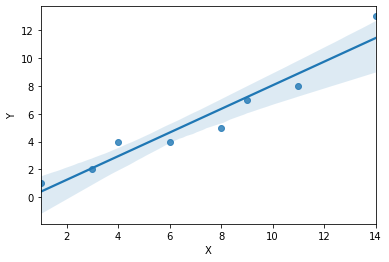

In [39]:
# Your code here.

sns.regplot(x='X', y='Y', data=party)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [40]:
# Your response here. 

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\begen\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           0.000102
Time:                        20:20:13   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [44]:
# Your response here. 

party1 = pd.DataFrame({'X': [3,6,8,9,11,14], 'Y':[2,4,5,7,8,13]})

X = party1[['X']]
Y = party1[['Y']]



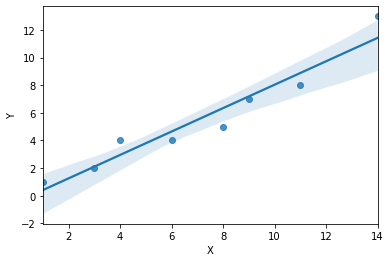

In [45]:
sns.regplot(x='X', y='Y', data=party)

In [46]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\begen\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     70.51
Date:                Tue, 16 Mar 2021   Prob (F-statistic):            0.00110
Time:                        20:30:18   Log-Likelihood:                -7.2561
No. Observations:                   6   AIC:                             18.51
Df Residuals:                       4   BIC:                             18.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7687      1.065     -1.661      0.172      -4.725       1.188
X              0.9728      0.116      8.397      0.001       0.651       1.294
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.033
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.517
Skew:                           0.089   Prob(JB):                        0.772
Kurtosis:                       1.572   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
